<a href="https://colab.research.google.com/github/Mnikito/4016/blob/main/HW1/HW1_Problem_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import imageio
import torch
from PIL import Image
from torchvision import transforms
import numpy as np
from matplotlib import pyplot as plt

In [3]:
################################################################################################################################
#Problem 3
################################################################################################################################

In [4]:
#Reading training data
import pandas as pd
housing = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/4106/HW1/Housing.csv"))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price'] 
Newtrain = housing[num_vars] 
Newtrain.head() 

,area,bedrooms,bathrooms,stories,parking,price
0,7420,4,2,3,2,13300000
1,8960,4,4,4,3,12250000
2,9960,3,2,2,2,12250000
3,7500,4,2,2,3,12215000
4,7420,4,1,2,2,11410000


In [6]:
def model(t_area, t_bedrooms, t_bathrooms, t_stories, t_parking, w1, w2, w3, w4, w5, b):
    return w5*t_parking + w4*t_stories + w3*t_bathrooms + w2*t_bedrooms + w1*t_area + b

In [7]:
#Price Predicition
t_area = torch.tensor(Newtrain['area'])
t_bedrooms = torch.tensor(Newtrain['bedrooms'])
t_bathrooms = torch.tensor(Newtrain['bathrooms'])
t_stories = torch.tensor(Newtrain['stories'])
t_parking = torch.tensor(Newtrain['parking'])
t_price = torch.tensor(Newtrain['price'])
#Normalized
t_areaN = t_area * 0.1
t_bedroomsN = t_bedrooms * 0.1
t_bathroomsN = t_bathrooms * 0.1
t_storiesN = t_stories * 0.1
t_parkingN = t_parking * 0.1

In [8]:
#Calculating the loss
def loss_fn(t_p, t_price):
    squared_diffs = (t_p - t_price)**2
    return squared_diffs.mean()

In [9]:
params = torch.tensor([1.0,1.0,1.0,1.0,1.0,0.0], requires_grad=True)

In [10]:
def training_loop(n_epochs, learning_rate, params, t_area, t_bedrooms, t_bathrooms, t_stories, t_parking, t_price):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:  # <1>
            params.grad.zero_()
        
        t_p = model(t_area, t_bedrooms, t_bathrooms, t_stories, t_parking, *params) 
        loss = loss_fn(t_p, t_price)
        loss.backward()
        
        with torch.no_grad():  # <2>
            params -= learning_rate * params.grad

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params

In [29]:
params = training_loop(
    n_epochs = 5000, 
    learning_rate = 1e-6, 
    params = torch.tensor([1.0,1.0,1.0,1.0,1.0,0.0], requires_grad=True), # <1> 
    t_area = t_areaN,
    t_bedrooms = t_bedroomsN,
    t_bathrooms = t_bathroomsN,
    t_stories = t_storiesN,
    t_parking = t_parkingN,
    t_price = t_price)

Epoch 500, Loss 3346414436352.000000
Epoch 1000, Loss 3346076794880.000000
Epoch 1500, Loss 3345739153408.000000
Epoch 2000, Loss 3345402036224.000000
Epoch 2500, Loss 3345065181184.000000
Epoch 3000, Loss 3344728064000.000000
Epoch 3500, Loss 3344390946816.000000
Epoch 4000, Loss 3344054353920.000000
Epoch 4500, Loss 3343717761024.000000
Epoch 5000, Loss 3343381430272.000000


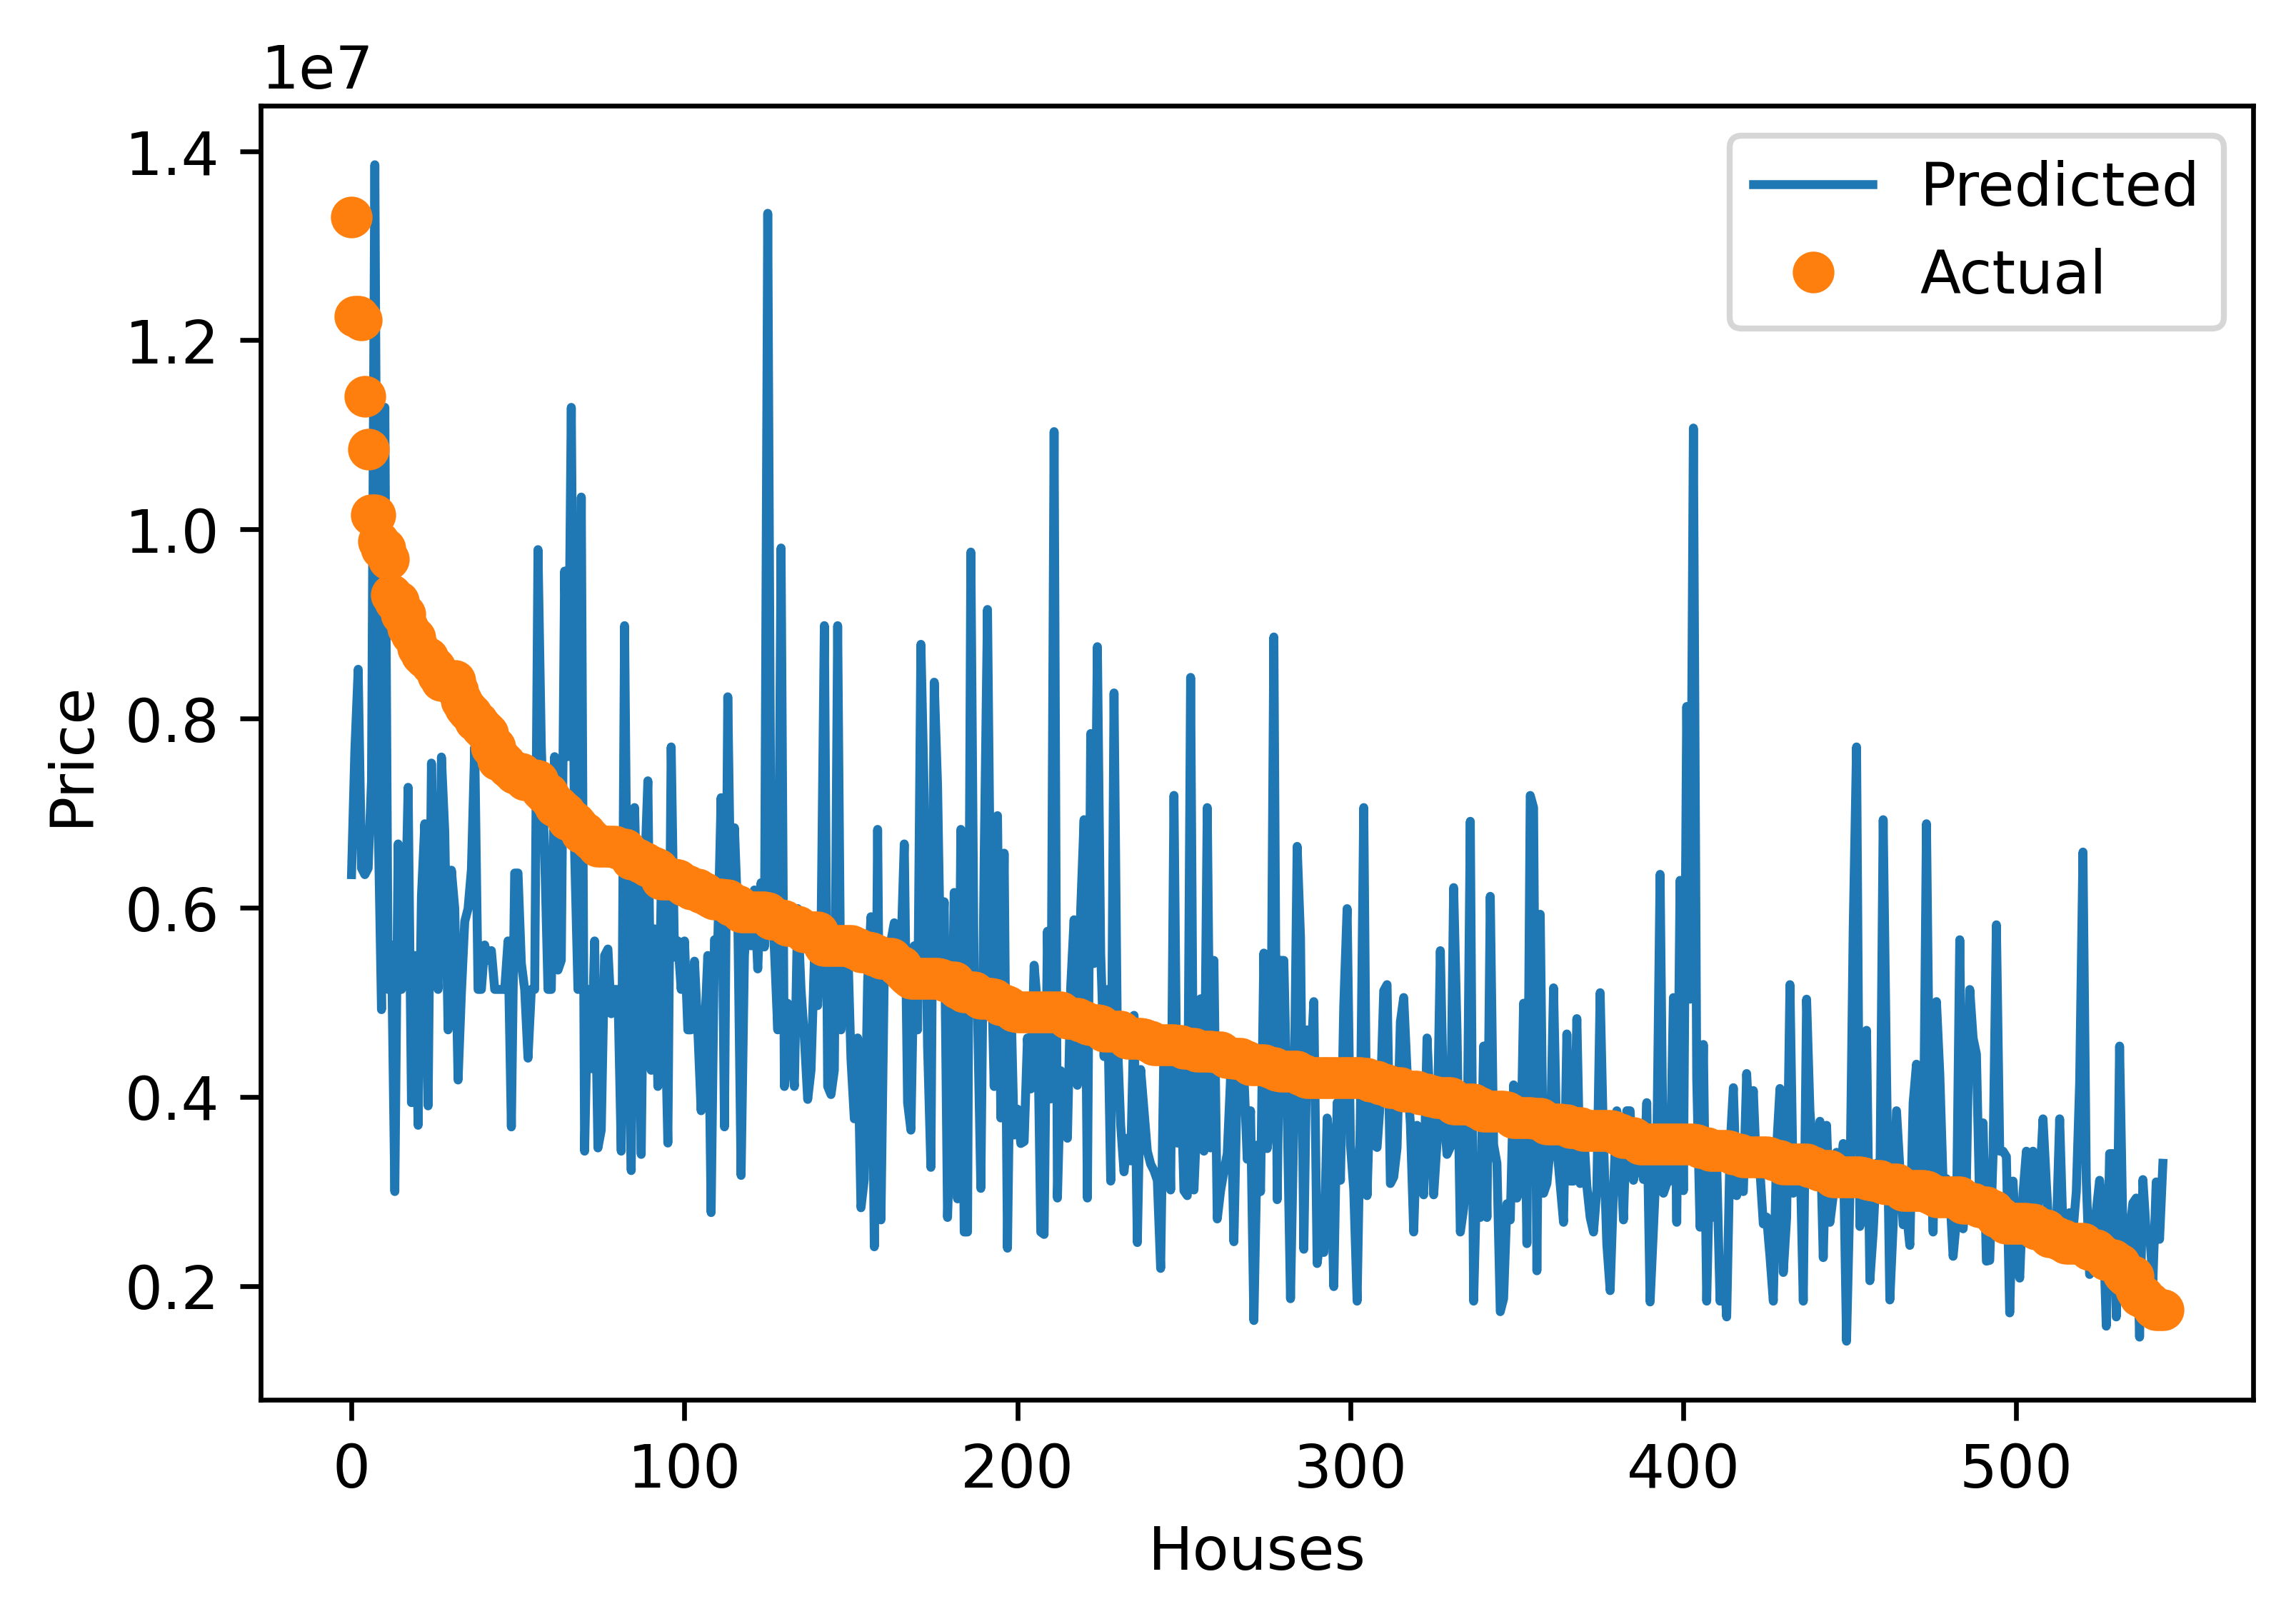

In [36]:
%matplotlib inline
t_p = model(t_areaN, t_bedroomsN, t_bathroomsN, t_storiesN, t_parkingN, *params)
fig = plt.figure(dpi=600)
plt.xlabel("Houses")
plt.ylabel("Price")
plt.plot(t_p.detach().numpy())
plt.plot(t_price.numpy(), 'o')
plt.legend(['Predicted', 'Actual'])